In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import math

## Spectrogram

Reference:
- https://f-legrand.fr/scidoc/docimg/numerique/tfd/tfdimage/tfdimage.html

(195, 162, 4)
(195, 162)


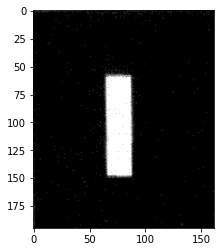

In [2]:
# Read image
img = plt.imread('image_test.png')
print(img.shape)

# Select just one layer (red) and convert to float
U_test = np.array(img[:,:,0], dtype = np.float64)
print(U_test.shape)

plt.imshow(U_test, cmap = 'gray')
plt.show()

Functions built

In [3]:
# Convert rgb to gray 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
# Convert a matrix into an RGB image matrix
def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a=1.0/gamma;
    norm=matrice.max()
    m = np.power(matrice/norm,a)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

# Generates an RGB image from a matrix, by applying a logarithmic function
def matriceImageLog(matrice,rgb):
    s = matrice.shape
    m = np.log10(1+matrice)
    min = m.min()
    max = m.max()
    m = (m-min)/(max-min)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

# Display the spectrum, Lx and Ly are the dimensions of the image
def plotSpectre(image, Lx, Ly):
    (Ny, Nx, p) = image.shape
    fxm = Nx*1.0 / (2*Lx)
    fym = Ny*1.0 / (2*Ly)
    plt.imshow(image,extent=[-fxm,fxm,-fym,fym])
    plt.xlabel("fx")
    plt.ylabel("fy")

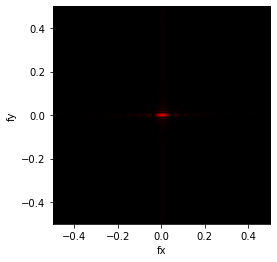

In [4]:
# The discrete Fourier transform
V = np.fft.fft2(U_test)

# Obtain the zero frequency center
VC = np.fft.fftshift(V)

# Calculates the power
P = np.power(np.absolute(VC),2)

# Convert to RGB matrix
img_test = matriceImage(P, 2.0, [1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img_test, img.shape[1], img.shape[0])

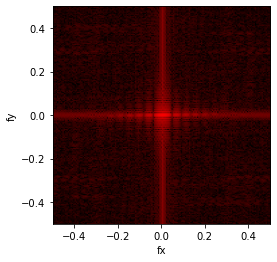

In [5]:
img_test = matriceImageLog(P,[1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img_test, img.shape[1], img.shape[0])

Load mat file

In [6]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [7]:
# Folder path
path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'
#path = 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography'

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'

dat = loadMatFile(file_path, file_name, key)
print(dat.shape)

(200, 200, 500)


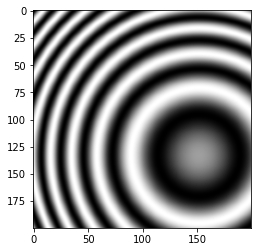

In [8]:
# Load and plot a randon example
img = dat[:,:,1]
plt.imshow(np.real(img), cmap = 'gray')
plt.show()

Spectrogram

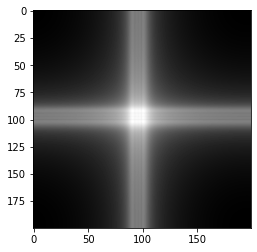

In [9]:
# The discrete Fourier transform
f = np.fft.fft2(img)

# Obtain the zero frequency center
fshift = np.fft.fftshift(f)

# Magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

## 1D Wigner distribution from scratch

**Image analysis based on the 1D local-directional Wigner distribution** 

The analysis of digital images can be performed through the local frequency information they enclose. The task of gathering such local spatial-frequency information can be fulfilled by the use of one of the existing space/space-frequency image representations. One of the most popular space-frequency (SF) representations is the Wigner distribution (WD) [1].  The WD has been approximated for discrete signals under the name of  pseudo-Wigner distribution (PWD) and it has been mathematically defined as [2,3]

### $W(n,k)=2 \sum\limits_{m= -\frac{N}{2}}^{\frac{N}{2}-1} z(n+m)z^*(n-m) e^{-i2 \pi k \left(\frac{2m}{N} \right) }$   (1)

                 
In Eq.(1) the variable $z(n)$ represents the gray value of pixel $n$ in a given image $z$. A directional PWD may be calculated by using this equation in a tilted 1D pixel-by-pixel sliding window $L_{\theta}$  conforming a string of values $z=z(-N/2), ..., z(0), ..., z(N/2)$. The central position of the window matches exactly pixel $n$ on the image. Eq.(1) can be interpreted as the discrete Fourier transform (DFT) of the product  $r(n,m)= z(n+m)z^*(n-m)$. Here $z^*$ indicates the complex-conjugate of signal $z$ (note that $z=z^*$ for real valued images). The sum is limited to a spatial interval $(-N/2,N/2-1)$. In Eq.(1), $n$ and $k$ represent the space and frequency discrete variables respectively, and $m$ is a shifting parameter, which is also discrete. Hence,a $\theta$ oriented full pixel-wise PWD of the image can be calculated by shifting the window over all the pixels in it.  

[1] E. Wigner, "On the quantum correction for thermodynamic equilibrium",Phys. Rev. 40, 749–759 (1932)

[2] T. A. C. M. Claasen and W. F. G. Mecklenbra¨uker, "The Wigner distribution—a tool for time-frequency analysis, Parts I-III," Philips J. Res. 35, 217–250, 276–300, 372–389 (1980)

[3] K. H. Brenner, "A discrete version of the Wigner distribution function" Proc. EURASIP, Sig. Process. II: Theories Applications, pp.307–309 (1983)

Reference:
- DIGITAL IMAGE PROCESSING IN THE SPATIAL-SPATIAL/FREQUENCY DOMAIN:
https://notebooks.azure.com/salva/projects/Digital-Image-Processing/html/002%20Image%20Frequency%20Histograms%20from%20the%20Wigner%20Distribution.ipynb

**Pre-processing**

Test image: (200, 200)


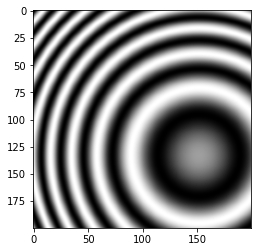

Frame background: (208, 208)


In [10]:
# Test image
test_image = img

# Window size
seq_length = 9

# Determine image shape
rows = test_image.shape[0]
columns = test_image.shape[1]
print('Test image: ' + str(test_image.shape))
plt.imshow(np.real(test_image), cmap = 'gray')
plt.show()

# Determine h pixels to frame the image
h = int((seq_length/2))

# Determine framing background image
frame = np.ones([rows+2*h, columns+2*h], dtype = complex)
print('Frame background: ' + str(frame.shape))

# Insert image into the frame
frame[h:rows+h, h:columns+h] = test_image

**1D Pseudo-Wigner Distribution (x axis)**

In [11]:
def wigner_distribution1(test_image, N, k_list, col):
    """
    Calculate the 1D pseudo-Wigner distribution of the test_image, N is the lenght in pixels of the operating windows, 
    k_list is a list with the frequencies and col is the column of test_image where the calculation will be made
    """
    # Determine image shape
    rows = test_image.shape[0]
    columns = test_image.shape[1]
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))

    # Determine framing background image
    frame = np.ones([rows+2*h, columns+2*h], dtype = complex)
    
    # Insert image into the frame
    frame[h:rows+h, h:columns+h] = test_image
    
    # Image with complex values
    z = frame
    
    # Auxiliary variable
    aux = 0
    pi = np.pi

    # 1D Wigner distribution
    wd = np.ones([rows, len(k_list)], dtype = complex)

    # Loop through the rows (x axis)
    for r in range(rows):

        if np.mod(r, 50) == 0:
            print('Row:' + str(r))

        # Adapt the position for the frame background image
        n = r + int(N/2)

        # Reset to zero (auxiliary variable)
        y = 0

        # Loop through the x frequency (Fx)
        for k in k_list:

            # Sum in the spatial interval
            aux = 0
            for m in range(-int(N/2), int(N/2 - 1) + 1):
                aux = (z[n + m, col] * np.conj(z[n - m, col])) * (np.exp(1j * 2 * pi * k *(2*pi/N))) + aux

            wd[r, y] = 2*aux

            # Upgrade variable
            y = y + 1
        
    return wd

Frequency length: 200
Row:0
Row:50
Row:100
Row:150
WD:(200, 200)


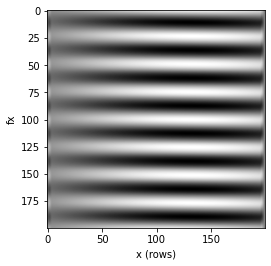

In [12]:
# Window's length 
N = 8

# Frequency in the x-axis (Fx)
k_list = np.arange(-5, 5, 0.05)
print('Frequency length: ' + str(len(k_list)))

# Column
col = 10 

# 1D pseudo-Wigner distribution
wd = wigner_distribution1(test_image, N, k_list, col)
print('WD:' + str(wd.shape))

# Transpose the matrix
wd_t = wd.transpose()

plt.imshow(np.real(wd_t), cmap = 'gray')
plt.xlabel('x (rows)')
plt.ylabel('fx')
plt.savefig(path + '\\output\\wigner_distribution\\wd_x.png')
plt.show()

## 2D Wigner Distribution from scratch

Firstly, some notations made:

**$K(m,n,r,s)=w(r,s)w*(-r,-s)f(m+r,n+s)f*(m-r,n-s)$**

**$W=\exp(-j4\pi/N)$**

According to [1], the 2D discrete windowed WVD is defined as:

### $W(m,n,u,v)=4 {\sum\limits_{r=-L}^{L} \sum\limits_{s=-L}^{L} K(m,n,r,s)W(rp+sq)}$   (2)

References used:

- [1] Image Quality Assessment Using the Joint Spatial/Spatial-Frequency Representation: https://www-l2ti.univ-paris13.fr
- [2] Image filtering abd analysis trough the Wigner Distribution
https://www.academia.edu/1316129/Image_filtering_and_analysis_through_the_Wigner_distribution?email_work_card=view-paper/~beghdadi/jasp2006_SNR_W.pdf

In [13]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [14]:
# Folder's path
path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'

# Load dictionary
dat = loadMatFile(file_path, file_name, key)
print(dat.shape)

(200, 200, 500)


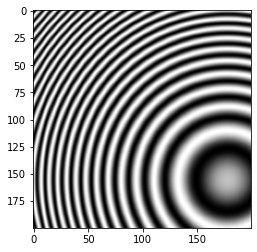

In [15]:
# Load and plot a randon example
hol = dat[:,:,0]
plt.imshow(np.real(hol), cmap = 'gray')
plt.show()

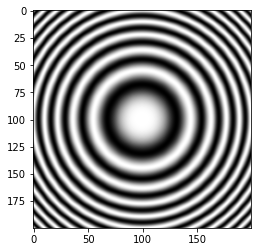

In [16]:
# Load and plot a specific example
file_path = path + '\\output\\main\\'
file_name = 'hol_center.mat'
key = 'hologram_out'
hol_center = loadMatFile(file_path, file_name, key)

plt.imshow(np.real(hol_center), cmap = 'gray')
plt.show()

In [17]:
# Convert rgb to gray 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

Image: (261, 263)


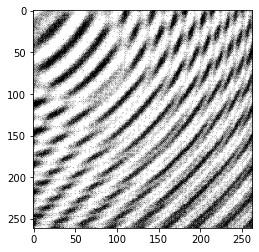

In [18]:
# Load image
img = plt.imread('image_test_3.png')

# Convert to gray (2 dimensions)
img = rgb2gray(img)

print('Image: ' + str(img.shape))

plt.imshow(img, cmap = 'gray')
plt.show()

In [19]:
def create_background(image, rows, columns, seq_length):
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))
    
    # Determine framing background image
    frame = np.ones([rows + 2*h, columns + 2*h], dtype = complex)

    # Insert image into the frame
    frame[h:rows+h, h:columns+h] = image
    
    return frame

In [20]:
def kernel_function(m, n, r, s, f):
    
    K = f[m + r, n + s] * np.conj(f[m - r, n - s])
    
    return K

**Compute the distribution from a single point (x,y)**

In [21]:
def wigner_distribution_2d_one_point(image, seq_length, x, y, fx, fy):
    
    print('Calculating...')
    
    # Image size
    rows = image.shape[0]
    columns = image.shape[1]
    
    # Create a background image
    frame = create_background(image, rows, columns, seq_length)
    
    # Compute the distribution over the frame
    f = frame
    
    # 2D matrix size depends on space frequencies
    p = fx.shape[0]
    q = fy.shape[0]
    
    # 2D Wigner distribution
    wigner_2d = np.ones(([p, q]), dtype = complex)
    
    # Determine h pixels to frame the image
    h = int(seq_length/2)
    
    # Sum goes from -L to L (Equation 2)
    L = int(seq_length/2)
    N = (2*L + 2) # VERIFY the reference!!!
    
    # Auxilary variable
    pi = np.pi
    aux = 0
    
    # Compute the distribution from a single point (x,y)
    for m in range(x, x + 1):
        
        for n in range(y, y + 1):

            # Loop through the rows in the 2D wigner matrix
            for pos_u in range(p):

                # Use the spatial frequencies in the fx array
                u = fx[pos_u]
                
                # Loop through the columns in the 2D wigner matrix
                for pos_v in range(q):
                    
                    # Use the spatial frequencies in the fy array
                    v = fy[pos_v]
                    
                    # Reset variable
                    aux = 0

                    # Sum
                    for r in range(-L, L+1):
                        
                        # Sum
                        for s in range(-L, L+1):

                            K = kernel_function(m + h, n + h, r, s, frame)
                            aux = K * np.exp(-4j*pi*(r*u + s*v)/N) + aux
                    
                    # Update
                    wigner_2d[pos_u,pos_v] = 4*aux
                    
    print('Calculated!')
    
    return wigner_2d

In [22]:
%%time

# Window length
seq_length = 9

# u, v : spatial frequencies 
# Frequency range in the x axis
fx = np.arange(-5, 5, 0.05)

# Frequency range in the y axis
fy = np.arange(-5, 5, 0.05)

# x, y : spatial coordinates
# Position in the image
x = 100
y = 100
print('Pixel value (%d, %d)=' %(x, y) + str(hol[x,y]))

# Calculate the distribution in the (x, y) position of the image
wigner_2d = wigner_distribution_2d_one_point(hol_center, seq_length, x, y, fx, fy)

print('Wigner distribution 2D: ' + str(wigner_2d.shape))

Pixel value (100, 100)=(21.79689873755217-24.332889310411918j)
Calculating...
Calculated!
Wigner distribution 2D: (200, 200)
Wall time: 19.7 s


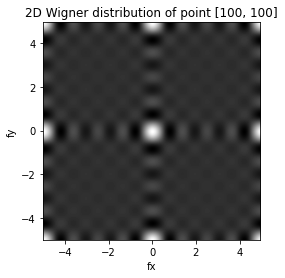

In [23]:
# Scales according to spatial frequencies
lim_inf = fx[0]
lim_sup = fx[-1]

# Save the figure
file_path = path + '\\output\\wigner_distribution\\'
file_name = 'new_wd_2d_(' + str(x) + ',' + str(y) + ').png'

# Display result
plt.imshow(np.real(wigner_2d), cmap = 'gray', extent = [lim_inf, lim_sup, lim_inf, lim_sup])
plt.title('2D Wigner distribution of point [%d, %d]' %(x, y))
plt.xlabel('fx')
plt.ylabel('fy')
plt.savefig(file_path + file_name)
plt.show()

## Brouillon

In [74]:
def dft(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


In [75]:
x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

(200, 200)
<class 'numpy.complex128'>


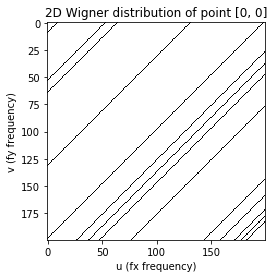

In [76]:
print(wd_2d.shape)
print(type(wd_2d[0,0]))
#print(wd_2d)

plt.imshow(np.abs(wd_2d), cmap = 'gray')
plt.title('2D Wigner distribution of point [%d, %d]' %(m, n))
plt.xlabel('u (fx frequency)')
plt.ylabel('v (fy frequency)')
plt.show()